<center><h1>KOLHE_PRANAV_HW2</h1></center>
<br>
<br>

Name: Pranav Kolhe
<br>
Github Username: pranavko12
<br>
USC ID: 6981095982

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import euclidean_distances

Get the Cycle Power Plant Data Set

In [2]:
data = pd.read_excel("../data/Folds5x2_pp.xlsx")
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
print("No. of rows: ",data.shape[0])
print("No. of columns: ",data.shape[1])

No. of rows:  9568
No. of columns:  5


We have 9568 rows and 5 columns. 

Out of the 5 columns, the first 4 columns represent 4 features consisting of hourly average ambient variables: 
Temperature (AT) 
Ambient Pressure (AP)
Relative Humidity (RH)
Exhaust Vacuum (V)
These features will be used to predict the 5th column: the net hourly electric energy output(EP) of the plant.

9568 rows represent individual hourly observations taken for these features

#### ii. pairwise scatterplots of all the varianbles

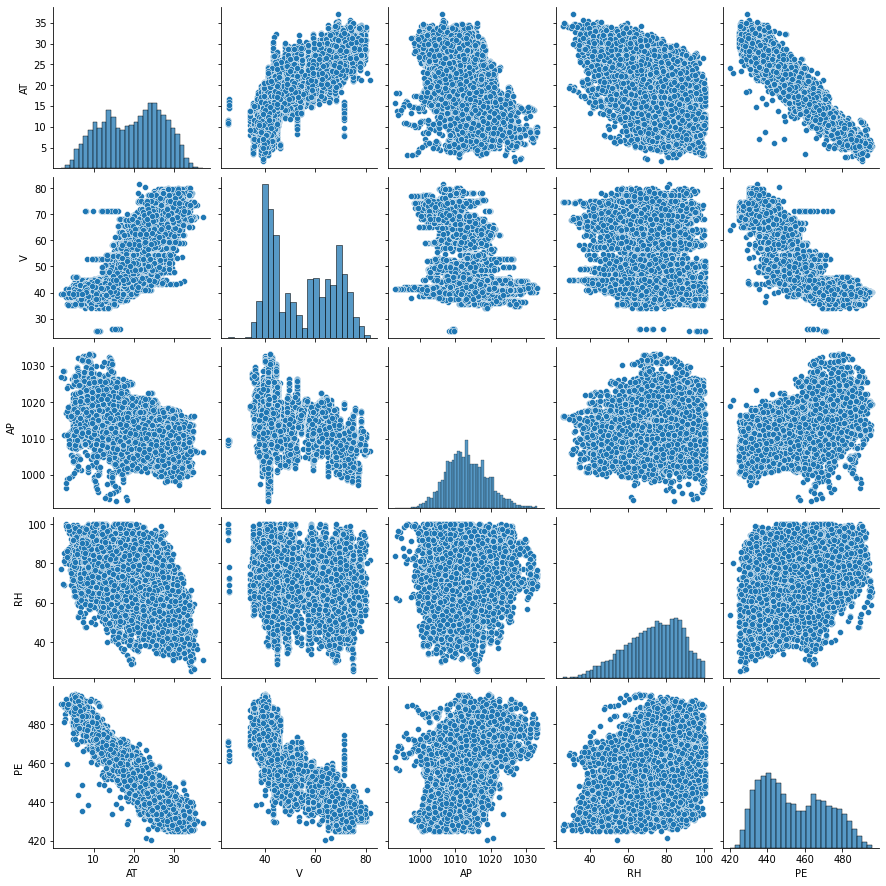

In [4]:
sns.pairplot(data)

Here, <br>
Temperature(AT) and Exhaust Vacuum(V) have a clear negative slope with PE. Hence PE has a strong negative relation with AT and V.<br>
Ambient Pressure(AP) and Relative Humidity(RH) don't show a conclusive slope for us to find a relation between them. While AP shows a slightly positive slope, its not conclusive enough for us to say that it is positively related to PE.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
mean = data.mean()
median = data.median()
ran = data.max() - data.min()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

table = pd.DataFrame({"Mean":mean, "Median":median, "Range":ran, "First Quartile":q1, "Third Quartile":q3, "InterQuartile Range":iqr})
table.T

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
InterQuartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

In [6]:
slr_coefficient = []
#Model 
def slr(x):
    x_train_input = data[x].to_numpy()
    y_train = data["PE"].to_numpy()
    x_train = sm.add_constant(x_train_input) 
    ols_model = sm.OLS(y_train, x_train)
    model = ols_model.fit()
    print(model.summary())
    influence = model.get_influence()
    cook_dist = influence.cooks_distance[0]
    outliers = np.where(cook_dist > 4/len(y_train))[0]
    y_pred = model.predict(x_train)
    plot(x_train_input, y_train, y_pred, outliers, x)
    slr_coefficient.append(model.params[-1])
    return len(outliers)

#Plots
def plot(x, y, y_pred, ol, col):
    plt.figure(figsize=(12, 8))
    plt.scatter(x,y, label='Data', alpha=0.3)
    plt.scatter(x[ol], y[ol], color="red", label='outliers')
    plt.plot(x, y_pred, color="red", label='Regression Line')
    plt.title(f"Simple Linear Regression for {col}")
    plt.xlabel(col)
    plt.ylabel('PE')
    plt.legend()
    plt.show()

**TEMPERATURE(AT)**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:41   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

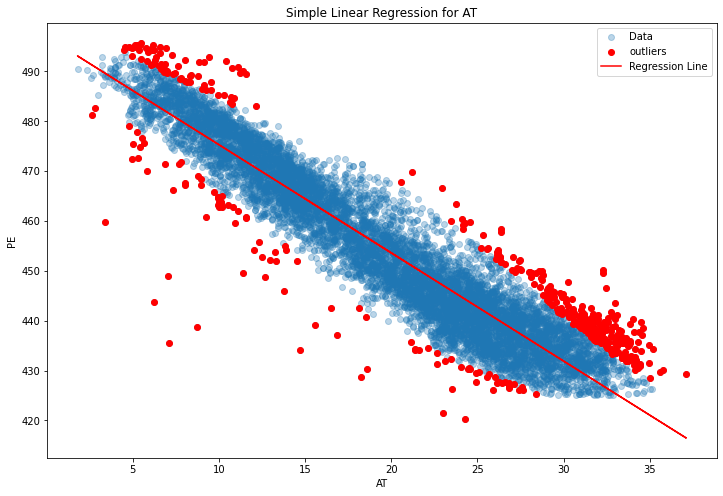

Outliers that can be removed are: 416


In [7]:
#For Temperature(AT)
print("Outliers that can be removed are:", slr("AT"))

**OBSERVATIONS:**<br>
Here,
1. p-value is 0.000. This means that "AT" column or the temperature feature is statistically highly signicant feature for predicting "PE". The graph shows a negative slope between AT and PE, validating the above point.
<br><br>
2. In the graph, we can see that there are 416 outliers in red that can be removed. (I have printed the number of outliers present below the graph) 

**FOR AMBIENT PRESSURE(AP)**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:41   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

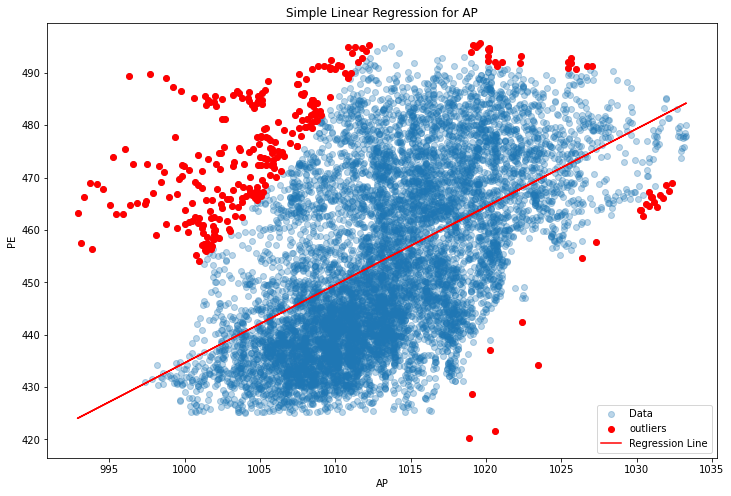

Outliers that can be removed are: 300


In [8]:
#For Ambient Pressure(AP)
print("Outliers that can be removed are:", slr("AP"))

**OBSERVATIONS:**<br>
Here,
1. p-value is 0.000. This means that "AP" column or the ambient pressure feature is statistically highly signicant feature for predicting "PE". The graph shows a slight positive slope between AP and PE, validating the above point.<br><br>

2. In the graph, we can see that there are 300 outliers in red that can be removed. (I have printed the number of outliers present below the graph) 

**FOR RELATIVE HUMIDITY**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:41   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

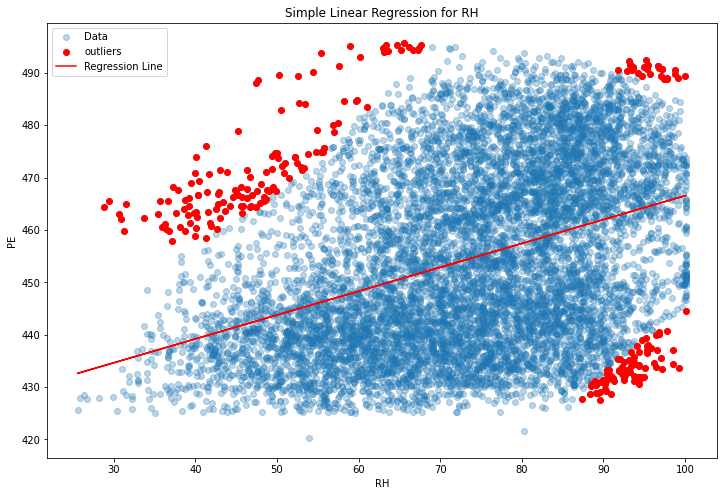

Outliers that can be removed are: 249


In [9]:
#For Relative Humidity(RH)
print("Outliers that can be removed are:", slr("RH"))

**OBSERVATIONS:**<br>
Here,
1. p-value is 0.000. This means that "RH" column or the relative humidity feature is statistically highly signicant feature for predicting "PE". The graph shows a slight positive slope between RH and PE, validating the above point.<br><br>

2. In the graph, we can see that there are 249 outliers in red that can be removed. (I have printed the number of outliers present below the graph) 

**FOR EXHAUST VACUUM(V)**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

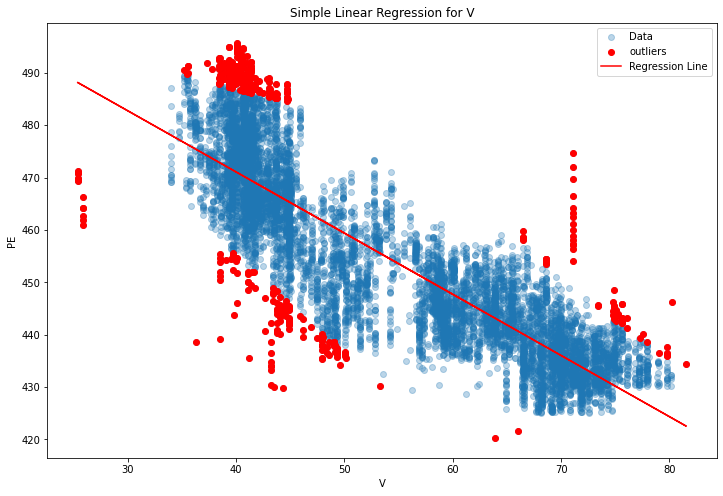

Outliers that can be removed are: 423


In [10]:
#For Exhaust Vacuum(V)
print("Outliers that can be removed are:", slr("V"))

**OBSERVATIONS:**<br>
Here,
1. p-value is 0.000. This means that "V" column or the exhaust vacuum feature is statistically highly signicant feature for predicting "PE". The graph shows a negative slope between AT and PE, validating the above point.
<br><br>
2. In the graph, we can see that there are 423 outliers in red that can be removed. (I have printed the number of outliers present below the graph) 

### (d) Multiple Regression

In [11]:
x_train_input = data[["AT","AP","RH","V"]]
y_train = data[["PE"]]
x_train = sm.add_constant(x_train_input) 
ols_model_mlr = sm.OLS(y_train, x_train)
mlr_model = ols_model_mlr.fit()
mlr_coefficient = mlr_model.params[1:5]
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

**OBSERVATIONS:**<br>
Here,
the p-values of all the 4 features is 0.000. This means that all the features are highly significant predictors to predict PE.<br>
Hence, we reject the null hypothesis, H0 for all the predictors.

### (e) 1c Compare to 1d

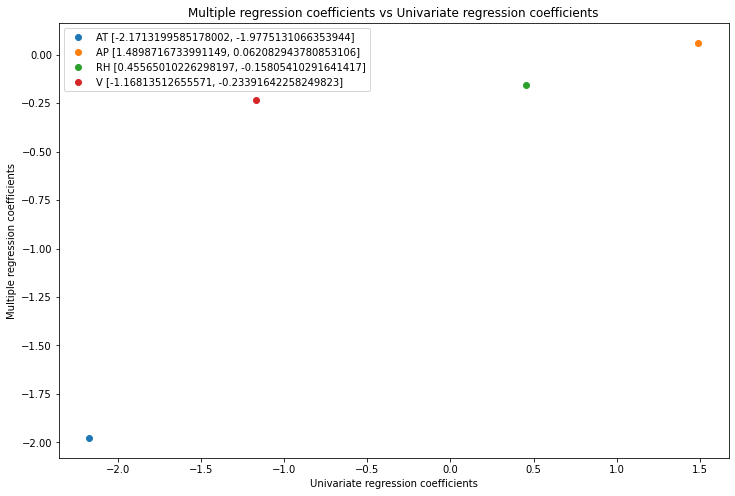

In [12]:
slr_coef = np.asarray(slr_coefficient)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(slr_coef[0], mlr_coefficient[0], label=f"AT [{slr_coef[0]}, {mlr_coefficient[0]}]")
ax.scatter(slr_coef[1], mlr_coefficient[1], label=f"AP [{slr_coef[1]}, {mlr_coefficient[1]}]")
ax.scatter(slr_coef[2], mlr_coefficient[2], label=f"RH [{slr_coef[2]}, {mlr_coefficient[2]}]")
ax.scatter(slr_coef[3], mlr_coefficient[3], label=f"V [{slr_coef[3]}, {mlr_coefficient[3]}]")
ax.set_title("Multiple regression coefficients vs Univariate regression coefficients")
ax.set_xlabel("Univariate regression coefficients")
ax.set_ylabel("Multiple regression coefficients")
ax.legend()
plt.show()

**OBSERVATIONS**<br>
Here,
1. **Temperature(AT)** has strong negative impact on PE in Simple Linear Regression, but its impact is slightly reduced in Multiple regression, which happens because of other features.
<br><br>
2. **Ambient Pressure(AP)** has a strong positive impact on PE in Simple Linear Regression, but the impact reduces a lot in Multiple Regression. This tells us that it is highly correlated with other features.
<br><br>
3. **Relative Humidity(RH)** has a slightly positive impact on PE in Simple Linear Regression, but has a slightly negative impact in Multiple Regression. This tells us that its impact is reversed when it interacts with other features.
<br><br>
4. **Exhaust Vacuum(V)** has strong negative impact on PE in Simple Linear Regression, but its impact is reduced in Multiple regression, which happens because of other features.
<br><br>
This also proves that all the features are correlated to each other(as we see a visible impact on the coefficient values).

### (f) Nonlinear Association

In [13]:
def nla(x):
    x_train_input = data[[x]]
    y_train = data[["PE"]]
    features = PolynomialFeatures(degree=3)
    x_train = features.fit_transform(x_train_input)
    ols_model = sm.OLS(y_train, x_train)
    model = ols_model.fit()
    print(model.summary())

**FOR TEMPERETURE(AT)**

In [14]:
nla("AT")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

**OBSERVATIONS:**<br>
Here,<br>
The p-value of the cubic term(x3) is 0.000. Hence, the null hypothesis can be rejected to show that there is some evidence of nonlinear association of AT with PE.

**FOR AMBIENT PRESSURE**

In [15]:
nla("AP")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

**OBSERVATIONS:**<br>
Here,<br>
The p-value of the cubic term(x3) is 0.000. Hence, the null hypothesis can be rejected to show that there is some evidence of nonlinear association of AP with PE.

**FOR RELATIVE HUMIDITY**

In [16]:
nla("RH")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**OBSERVATIONS:**<br>
Here,<br>
The p-value of the cubic term(x3) is 0.000. Hence, the null hypothesis can be rejected to show that there is some evidence of nonlinear association of RH with PE.

**FOR EXHAUST VACUUM**

In [17]:
nla("V")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

**OBSERVATIONS:**<br>
Here,<br>
The p-value of the cubic term(x3) is 0.014. Its not exactly 0 but is lesser than the alpha value of 0.05. Hence, the null hypothesis can be rejected to show that there is some evidence of nonlinear association of V with PE.

### (g) Interactions of Predictors

In [18]:
x_train_input = data[["AT","AP","RH","V"]]
y_train = data[["PE"]]
features = PolynomialFeatures(interaction_only=True)
x_train = features.fit_transform(x_train_input)
feature_names = features.get_feature_names_out(["AT", "AP", "RH", "V"])
x_train_df = pd.DataFrame(x_train, columns=feature_names)
ols_model = sm.OLS(y_train, x_train_df)
model = ols_model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

**OBSERVATIONS:**<br>
1. The interaction between AT and RH, AT and V, AP and RH, AP and V have p-values that are less than 0.05. Hence, these interactions are statistically significant.
<br><br>
2. The interactions between AP and AT, RH and V have p-values that are greater than 0.05. Hence, these interactions are not statistically significant.
<br><br>
Hence, there is evidence of association of interactions of predictors with the response.

### (h) Improvement

In [19]:
x = data[["AT","AP","RH","V"]]
y = data[["PE"]] 
x_train_input, x_test_input, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_train = sm.add_constant(x_train_input)
x_test = sm.add_constant(x_test_input)

**REGRESSION MODEL WITH ALL PREDICTORS**

In [20]:
mse = {}
ols_model_pred = sm.OLS(y_train, x_train)
model_pred = ols_model_pred.fit()
pred_train = model_pred.predict(x_train)
pred_test = model_pred.predict(x_test)
print(model_pred.summary())
pred_train_mse = mean_squared_error(y_train, pred_train)
pred_test_mse = mean_squared_error(y_test, pred_test)
mse['Test MSE for Regression model with all predictors'] = pred_test_mse
mse['Train MSE for Regression model with all predictors'] = pred_train_mse

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.174e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -19705.
No. Observations:                6697   AIC:                         3.942e+04
Df Residuals:                    6692   BIC:                         3.945e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.3015     11.742     38.861      0.0

**REGRESSION MODEL INVOLVING ALL POSSIBLE INTERACTION TERMS AND QUADRACTIC NONLINEARITY**

In [21]:
feature = PolynomialFeatures(2)
x_train_pf = feature.fit_transform(x_train_input)
ols_model_all = sm.OLS(y_train, x_train_pf)
model_all = ols_model_all.fit()
print(model_all.summary())
f =feature.get_feature_names_out()
dictf={}
for i in range(1,15):
    dictf[f'x{i}'] = f[i]
display(dictf)

x_test_pf = feature.fit_transform(x_test_input)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7201.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -19238.
No. Observations:                6697   AIC:                         3.851e+04
Df Residuals:                    6682   BIC:                         3.861e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7611.0858   1438.540     -5.291      0.0

{'x1': 'AT',
 'x2': 'AP',
 'x3': 'RH',
 'x4': 'V',
 'x5': 'AT^2',
 'x6': 'AT AP',
 'x7': 'AT RH',
 'x8': 'AT V',
 'x9': 'AP^2',
 'x10': 'AP RH',
 'x11': 'AP V',
 'x12': 'RH^2',
 'x13': 'RH V',
 'x14': 'V^2'}

**OBSERVATIONS:**<br>
Here, as we can see that these interactions have a p-value greater than alpha(0.05):
1. AT and AP (x6) 
2. AP and V (x11)
3. RH and V (x13)
4. V^2 (x14)<br><br>
Hence, we can remove these interactions to imporve our model.

**IMPROVED MODEL**

In [22]:
x_train_improved = x_train_pf[:, [1, 2, 3, 4, 5, 7, 8, 9, 10, 12]]
x_test_improved = x_test_pf[:, [1, 2, 3, 4, 5, 7, 8, 9, 10, 12]]
ols_model_improved = sm.OLS(y_train, x_train_improved)
model_improved = ols_model_improved.fit()
x_test_pf = feature.fit_transform(x_test_input)
improved_train = model_improved.predict(x_train_improved)
improved_test = model_improved.predict(x_test_improved)
improved_train_mse = mean_squared_error(y_train, improved_train)
improved_test_mse = mean_squared_error(y_test, improved_test)
mse['Test MSE for Improved Regression model'] = improved_test_mse
mse['Train MSE for Improved Regression model'] = improved_train_mse

In [23]:
mse_df = pd.DataFrame(mse.items(), columns=["Type of MSE", "MSE"])
mse_df

,Type of MSE,MSE
0,Test MSE for Regression model with all predictors,20.126607
1,Train MSE for Regression model with all predic...,21.047413
2,Test MSE for Improved Regression model,17.923611
3,Train MSE for Improved Regression model,18.585294


**OBSERVATION**<br>
Here we can see that our improved model has reduced the MSE that we had before removing the insignificant interactions.

### (i) KNN

**KNN FOR RAW FEATURES**

In [24]:
k_values = np.arange(1, 101, 1)
k_inverse = 1/k_values
def knn(x_train, x_test, y_train, y_test):
    train_error = list()
    test_error = list()
    test_mse = float('inf')
    opt_k = float('inf')
    for k in k_values:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(x_train, y_train)
        pred_train = knn_model.predict(x_train)
        pred_test = knn_model.predict(x_test)
        raw_train_mse = mean_squared_error(pred_train, y_train)
        raw_test_mse = mean_squared_error(pred_test, y_test)
        train_error.append(raw_train_mse)
        test_error.append(raw_test_mse)
        if raw_test_mse < test_mse:
            test_mse = raw_test_mse
            opt_k = k
        
    return opt_k, train_error, test_error

In [25]:
opt_k, train_error,test_error = knn(x_train_input, x_test_input, y_train, y_test)
min_mse_test_raw = min(test_error)
print("Minimum test MSE for Raw Features: - " , min_mse_test_raw)
print("Optimal k: - " , opt_k)

Minimum test MSE for Raw Features: -  15.841542039707413
Optimal k: -  5


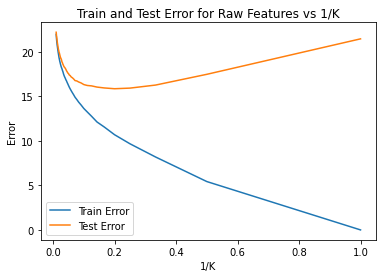

In [26]:
plt.plot(k_inverse, train_error, label='Train Error')
plt.plot(k_inverse, test_error, label='Test Error')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.title('Train and Test Error for Raw Features vs 1/K')
plt.legend()
plt.show()

**KNN FOR NORMALIZED FEATURES**

In [27]:
normalize = MinMaxScaler()
x_train_normalized = normalize.fit_transform(x_train_input)
x_test_normalized = normalize.fit_transform(x_test_input)
opt_k, train_error,test_error = knn(x_train_normalized, x_test_normalized, y_train, y_test)
min_mse_test_norm = min(test_error)
print("Minimum test MSE for Normalized Features: - " , min_mse_test_norm)
print("Optimal k: - " , opt_k)

Minimum test MSE for Normalized Features: -  17.245955328508575
Optimal k: -  9


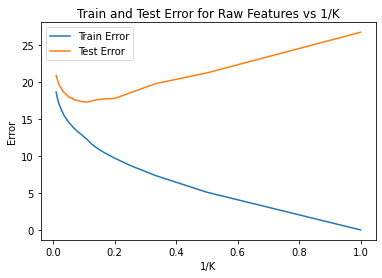

In [28]:
plt.plot(k_inverse, train_error, label='Train Error')
plt.plot(k_inverse, test_error, label='Test Error')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.title('Train and Test Error for Raw Features vs 1/K')
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [29]:
mse['KNN with Raw Features'] =  min_mse_test_raw
mse['KNN with Normalized Features'] =  min_mse_test_norm
mse_df = pd.DataFrame(mse.items(), columns=["Type of MSE", "Test MSE"])
mse_df

,Type of MSE,Test MSE
0,Test MSE for Regression model with all predictors,20.126607
1,Train MSE for Regression model with all predic...,21.047413
2,Test MSE for Improved Regression model,17.923611
3,Train MSE for Improved Regression model,18.585294
4,KNN with Raw Features,15.841542
5,KNN with Normalized Features,17.245955


**OBSERVATIONS<br>**
Here,<br>
We can see that the lowest MSE for linear regression is MSE of Improved Regression model and for KNN is MSE of Raw features.<br>
Hence, KNN Regression model is better than Linear Regression model for our data

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

Here, we would prefer flexible method.<br>
With an extremely large sample size, the chances of overfitting is very low as the model gets more diverse data. This helps the model find patterns more effectively rather than memorizing noise. <br>
Also, with small number of predictors, there are fewer parameters to estimate,which reduces model complexity. This makes the model less sensitive to noise.<br><br>
Hence, a flexible method is preferred here.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Here, we would prefer inflexible method.<br>
Now that the number of predictors is extremely large but the sample size is small, flexible model will tend to overfit as the model will end up memorizing the training data  instead of finding valuable patterns. This is allow the model to fit noise. <br><br>
Hence, Inflexible models are preferred here as they prevent overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

Here, we would prefer flexible method.<br>
Due to high non-linearity, the inflexible model will underfit the data.<br>
Flexible models work well with non-linearity, and hence would be preferred here.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Here, we would prefer inflexible method.<br>
Since the variance is extremely high, the flexible model will capture too much noise, which would then cause overfitting.<br>
Hence, inflexible model is preferred as it prioritizes simplicity, reducing the chance of overfitting

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [40]:
ed_pts = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
tp = [[0,0,0]]
y = ["Red", "Red", "Red", "Green", "Green", "Red"]
ed = euclidean_distances(ed_pts, tp).flatten()
disp = pd.DataFrame(ed_pts, columns=["X1", "X2", "X3"])
disp["Distance"] = ed
disp["Y"] = y
disp.index = range(1, len(disp) + 1)
print(disp)

   X1  X2  X3  Distance      Y
1   0   3   0  3.000000    Red
2   2   0   0  2.000000    Red
3   0   1   3  3.162278    Red
4   0   1   2  2.236068  Green
5  -1   0   1  1.414214  Green
6   1   1   1  1.732051    Red


### (b) What is our prediction with K = 1? Why?

If k=1, we will choose the 5th point: [-1,0,1]. This is because the euclidean distance of this point is the smallest: 1.141214, making it the closest point.<br><br>
Hence, our prediction would be Green

### (c) What is our prediction with K = 3? Why?

If k=3, we will choose the 3 closest points to 3: [-1,0,1], [1,1,1], [2,0,0]. This is because these points have the 3 smallest euclidean distances, making it the closest 3 points.<br>
Now, we have 2 red and 1 green points.<br><br>
Hence, our prediction would be Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly non-linear, then a small K would be the best value.<br>
This is because larger k makes the model inflexible. As we have seen in the previous question, flexible model works well with non-linearity.<br><br>
Hnce, by taking a small k, the flexibility of the model increases, making it better for the non-linear decision boundary.

**References:**<br>
1. https://www.statsmodels.org/stable/regression.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
3. Chatgpt Prompt: "which is the best way to find out outliers in regression models?"
4. Chatgpt Prompt: "how to show non-linear association"